<a href="https://colab.research.google.com/github/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/blob/main/ML_KABIR_LOUIS_MACCHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - **Engine data**
### Machine Learning - MMN 4
#### *MACCHI Nicola, KABIR Mohamed, LOUIS Viny-Paul*

### About Dataset

The dataset could include various features and measurements related to the engine health of vehicles, such as engine RPM, temperature, pressure, and other sensor data. It may also include metadata on the vehicle, such as make, model, year, and mileage.

### Why

This dataset could be used to develop a predictive maintenance model for automotive engines. By analyzing trends, artificial intelligence could anticipate repair needs, helping owners and mechanics to intervene before a breakdown occurs. This would improve the performance and longevity of engines.

Another possible application would be the comparative analysis of the performance of different engines and vehicles. This would allow researchers to evaluate the most effective manufacturers or maintenance strategies that foster innovation in the automotive sector.

In [ ]:
url_csv = "https://raw.githubusercontent.com/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/refs/heads/main/engine_data.csv" # Raw data URL on our GitHub repository
import pandas as pd
df = pd.read_csv(url_csv )

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import joblib
import math

sns.set(style="whitegrid") # Set the aesthetic style of the plots

In [ ]:
print("File:", url_csv)
print("Shape:", df.shape) # Print the shape of the DataFrame (rows, columns)
display(df.head(10)) # Display the first 10 rows of the DataFrame

File: https://raw.githubusercontent.com/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/refs/heads/main/engine_data.csv
Shape: (19535, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [ ]:
target_col = "Engine Condition" # Define the target column for prediction
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found. Columns: {list(df.columns)}")
if not pd.api.types.is_categorical_dtype(df[target_col]): # Ensure target column is categorical
    df[target_col] = df[target_col].astype('category')

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c != target_col] # Identify numerical feature columns
print("Numeric feature columns:", num_cols)

Numeric feature columns: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']


/tmp/ipython-input-3928756775.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[target_col]): # Ensure target column is categorical


In [ ]:
print("\n--- Dtypes & Non-null counts ---")
display(df.info()) # Display information about the DataFrame, including data types and non-null counts


--- Dtypes & Non-null counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


None

In [ ]:
print("\n--- Numeric summary (describe) ---")
display(df[num_cols].describe().T) # Display descriptive statistics for numerical columns


--- Numeric summary (describe) ---


,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912


In [ ]:
print("\n--- Missing values per column ---")
missing = df.isnull().sum() # Calculate the number of missing values per column
display(missing)


--- Missing values per column ---


,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0



Engine Condition Distribution:
Engine Condition
0     7218
1    12317
Name: count, dtype: int64

Healthy (1): 12,317 (63.1%)
Unhealthy (0): 7,218 (36.9%)



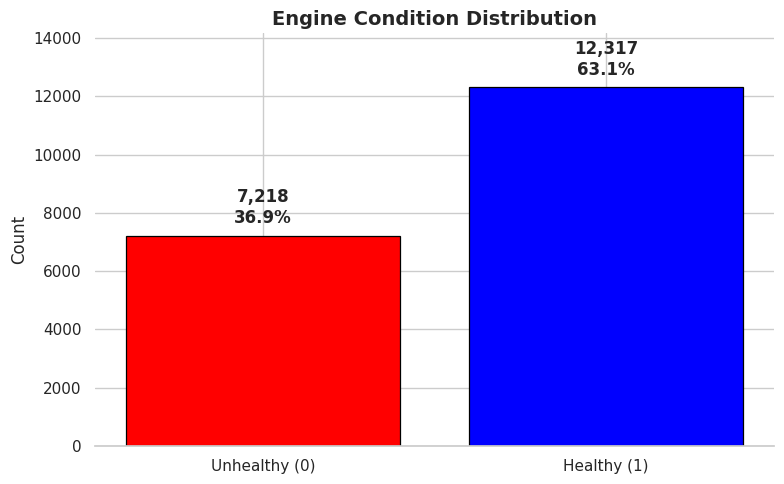

In [ ]:
# Prepare counts (guarantee both 0 and 1 keys exist)
counts = df['Engine Condition'].value_counts().sort_index().reindex([0, 1], fill_value=0)
total = len(df)

# Print summary
print("\nEngine Condition Distribution:")
print(counts)
print(f"\nHealthy (1): {counts.loc[1]:,} ({counts.loc[1]/total*100:.1f}%)")
print(f"Unhealthy (0): {counts.loc[0]:,} ({counts.loc[0]/total*100:.1f}%)\n")

# Plot (single bar chart)
fig, ax = plt.subplots(figsize=(8, 5))

labels = ["Unhealthy (0)", "Healthy (1)"]
colors = ['red', 'blue']

bars = ax.bar(labels, counts.values, color=colors, edgecolor="black", linewidth=0.9)

# Title / labels
ax.set_title("Engine Condition Distribution", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=12)
ax.set_ylim(0, counts.max() * 1.15)  # small headroom for labels

# Annotate bars with count and percent
for bar, value in zip(bars, counts.values):
    height = bar.get_height()
    pct = value / total * 100
    ax.annotate(f"{int(value):,}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6), textcoords="offset points",
                ha="center", va="bottom", fontweight="bold")

sns.despine(left=True)
plt.tight_layout()
plt.show()

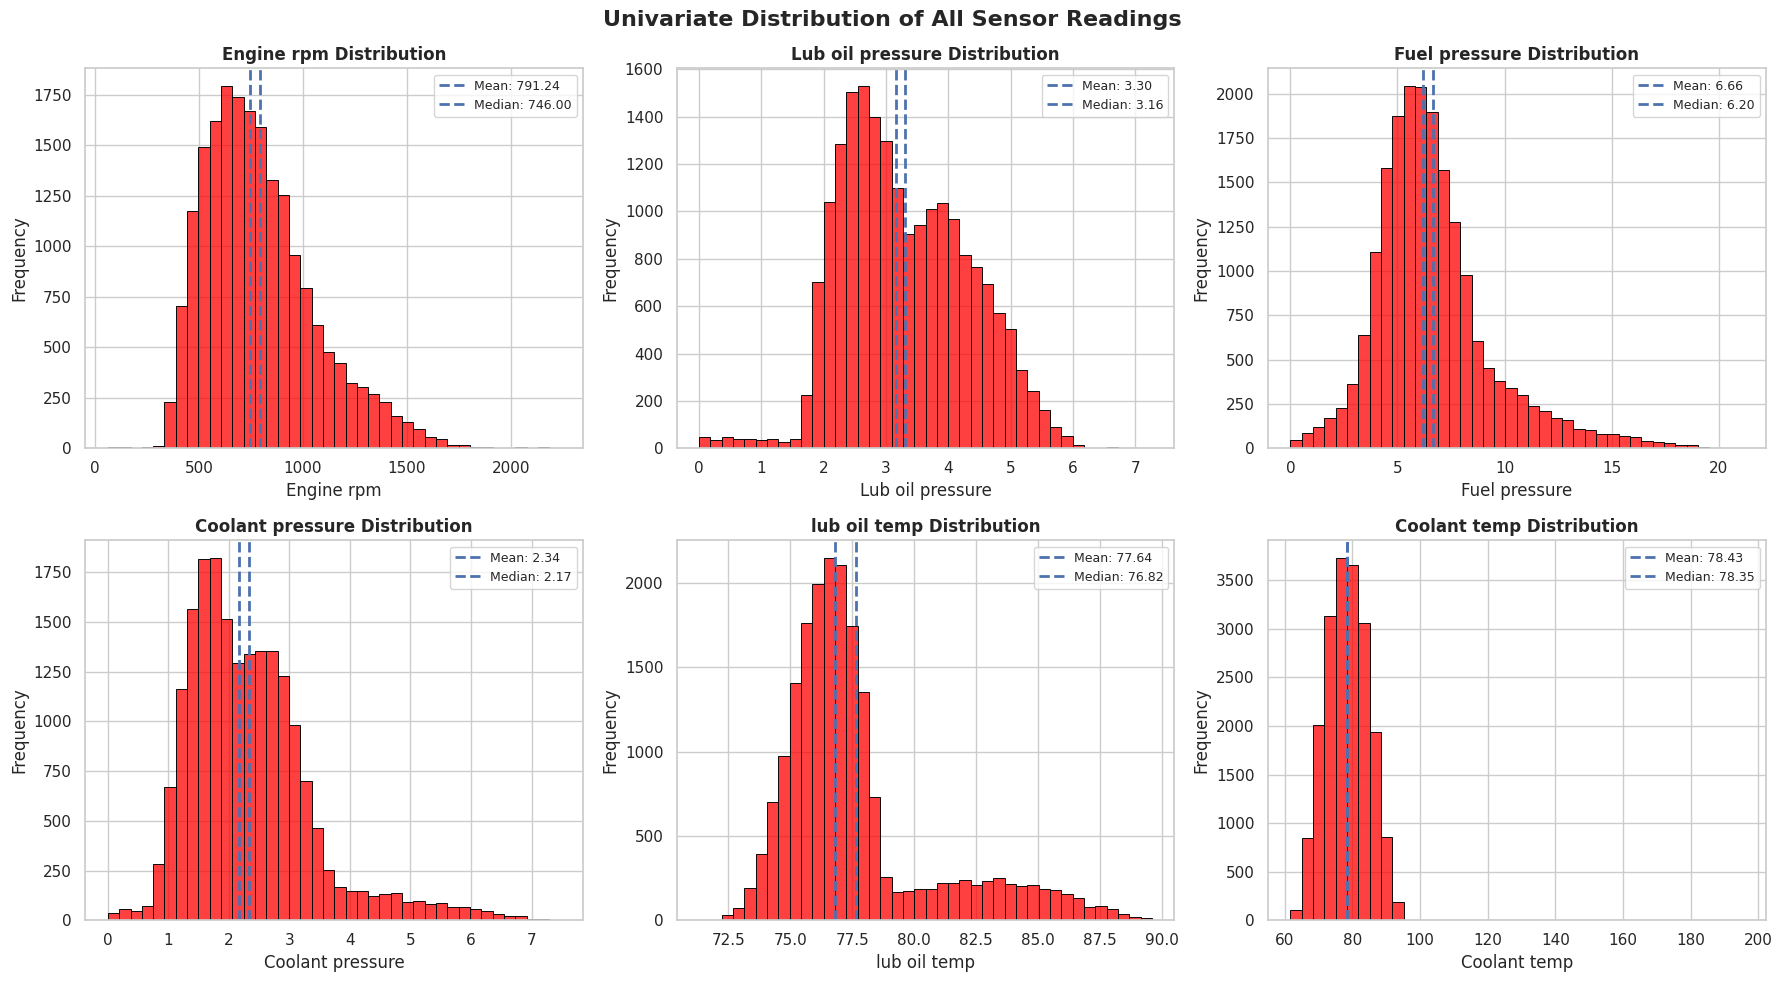

In [ ]:
# Feature columns (exclude target)
feature_cols = [col for col in df.columns if col != "Engine Condition"]

# Adaptive subplot layout
n_cols = 3
n_rows = math.ceil(len(feature_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    data = df[col].dropna()

    # Histogram
    sns.histplot(data, bins=40, ax=axes[i], color="red", edgecolor="black")

    # Mean & Median
    axes[i].axvline(data.mean(), linestyle="--", linewidth=2, label=f"Mean: {data.mean():.2f}")
    axes[i].axvline(data.median(), linestyle="--", linewidth=2, label=f"Median: {data.median():.2f}")

    axes[i].set_title(f"{col} Distribution", fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend(fontsize=9)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global title
plt.suptitle("Univariate Distribution of All Sensor Readings",
             fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

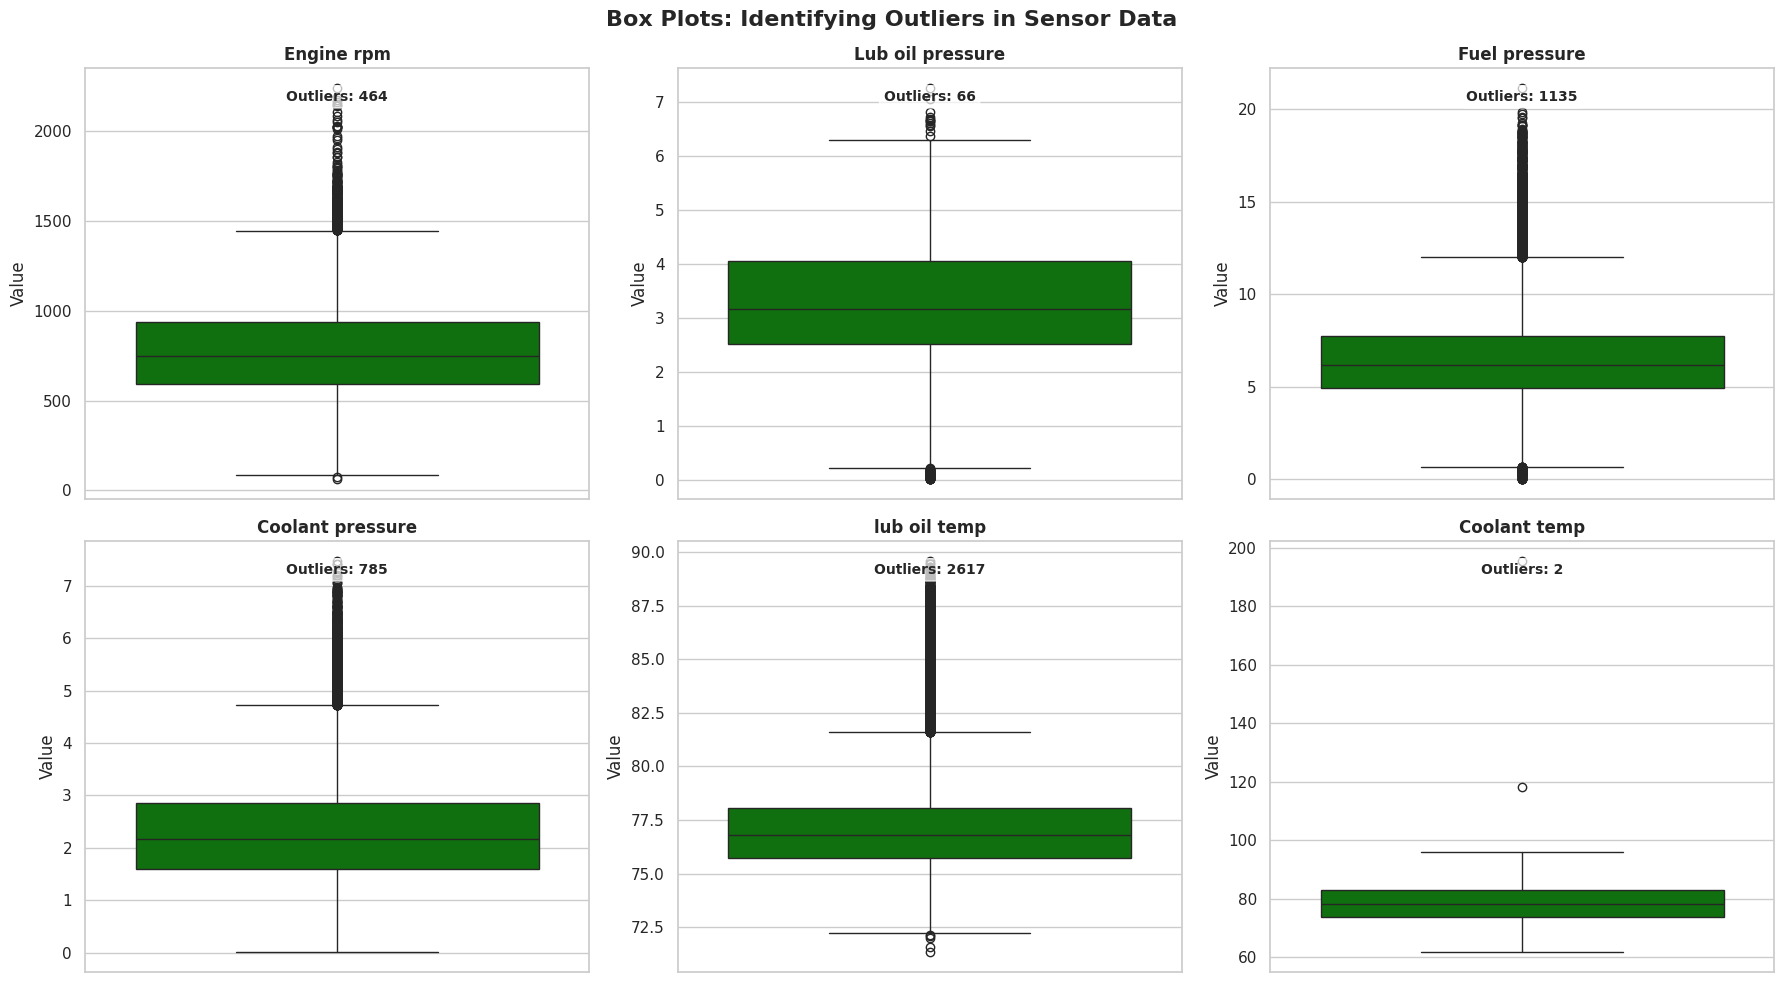

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    data = df[col].dropna()

    # Boxplot
    sns.boxplot(y=data, ax=axes[i], color="green")
    axes[i].set_title(col, fontweight="bold")
    axes[i].set_ylabel("Value")

    # Outlier calculation
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum()

    # Display outlier count
    axes[i].text(0.5, 0.95, f"Outliers: {outliers}",
                 transform=axes[i].transAxes,
                 ha="center", va="top",
                 fontsize=10, fontweight="bold",
                 bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

# Global title
plt.suptitle("Box Plots: Identifying Outliers in Sensor Data",
             fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

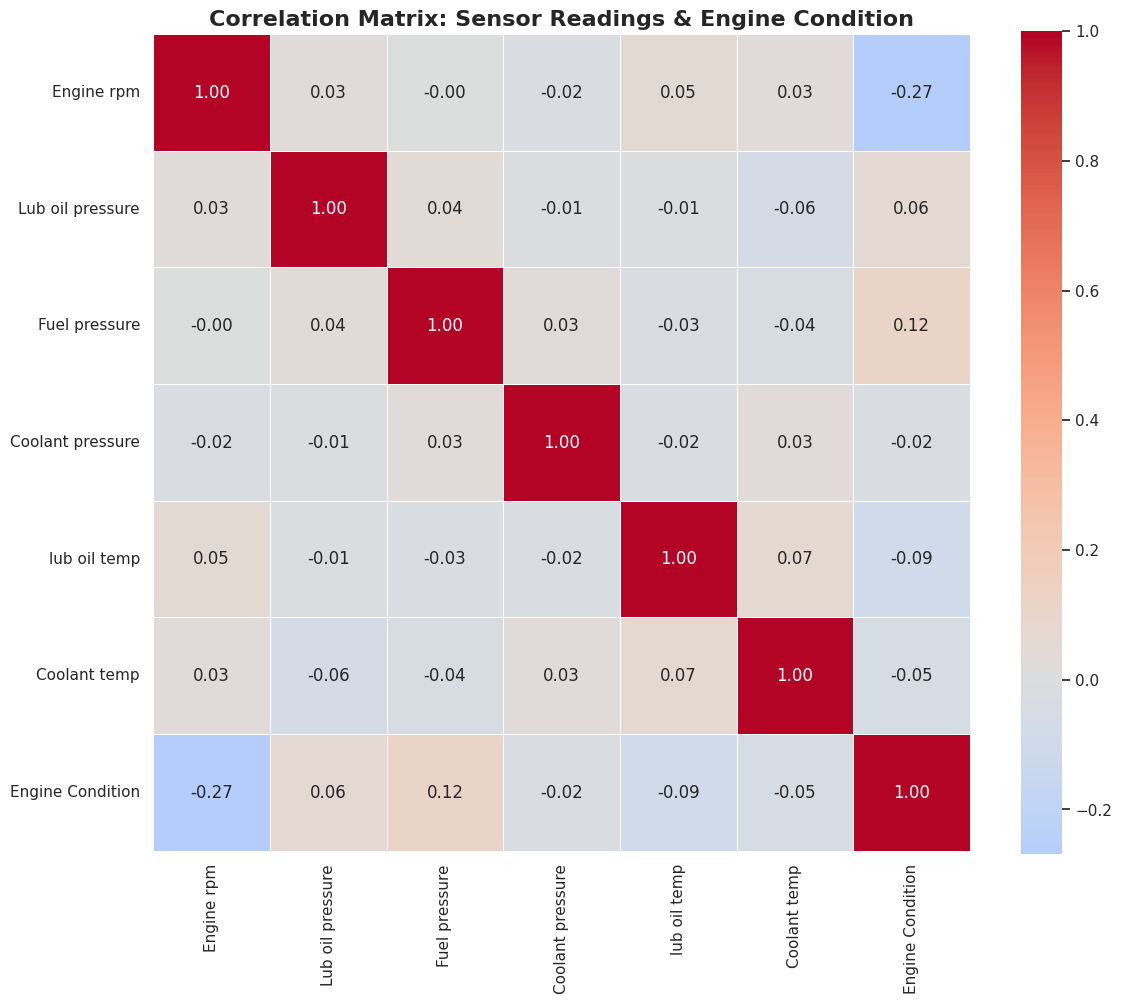

Correlation with Engine Condition:
Engine rpm         -0.268201
lub oil temp       -0.093635
Coolant temp       -0.046326
Coolant pressure   -0.024054
Lub oil pressure    0.060904
Fuel pressure       0.116259
Name: Engine Condition, dtype: float64


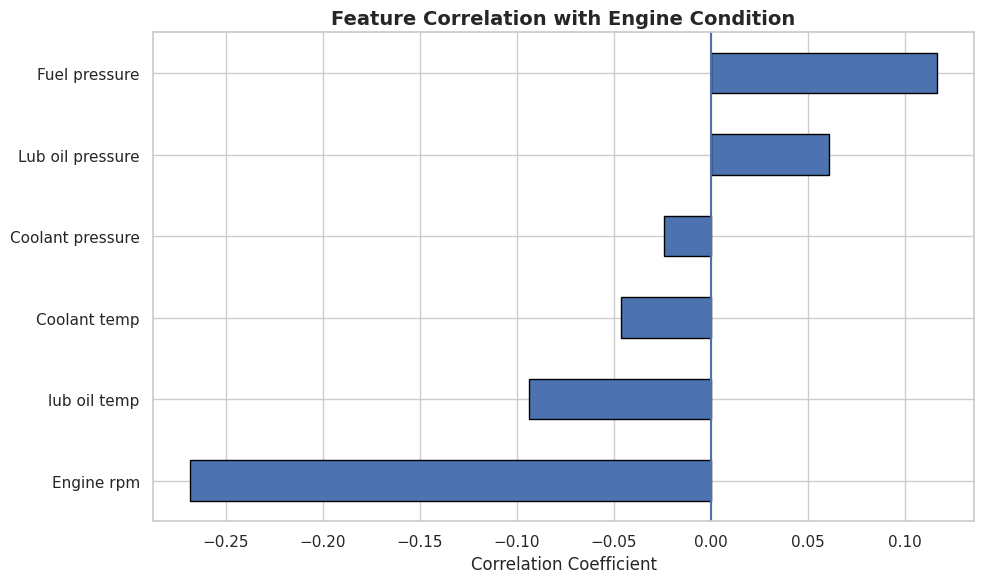

Insights:
   Positive correlation: Higher values → healthier engine
   Negative correlation: Higher values → unhealthy engine
   Temperature features show moderate correlation with engine health


In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", center=0,
            square=True, linewidths=0.5)

plt.title("Correlation Matrix: Sensor Readings & Engine Condition",
          fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Correlation with target
target_corr = corr_matrix["Engine Condition"]\
              .drop("Engine Condition")\
              .sort_values()

print("Correlation with Engine Condition:")
print(target_corr)

# Bar plot
plt.figure(figsize=(10, 6))
target_corr.plot(kind="barh", edgecolor="black")

plt.title("Feature Correlation with Engine Condition",
          fontsize=14, fontweight="bold")
plt.xlabel("Correlation Coefficient")
plt.axvline(0)
plt.tight_layout()
plt.show()

print("Insights:")
print("   Positive correlation: Higher values → healthier engine")
print("   Negative correlation: Higher values → unhealthy engine")
print("   Temperature features show moderate correlation with engine health")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Data cleaning
df = df.dropna() # Remove rows with any missing values
df = df.drop_duplicates() # Remove duplicate rows

# Define features and target
X = df.drop('Engine Condition', axis=1) # Features (all columns except the target)
y = df['Engine Condition'] # Target variable

# Feature scaling
scaler = RobustScaler() # Initialize RobustScaler for feature scaling
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # Scale features to have zero mean and unit variance

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y # Split data into training and testing sets
)

# Verification section
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Shape after scaling:", X_scaled.shape)
print("\n Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nMean of scaled features (should be close to 0):")
print(X_scaled.mean().round(3))
print("\nStd of scaled features (should be close to 1):")
print(X_scaled.std().round(3))
print("\nPreprocessing complete and data ready for modeling!")

Shape of X (features): (19535, 6)
Shape of y (target): (19535,)
Shape after scaling: (19535, 6)

 Training set shape: (15628, 6)
Test set shape: (3907, 6)

Mean of scaled features (should be close to 0):
Engine rpm          0.133
Lub oil pressure    0.092
Fuel pressure       0.160
Coolant pressure    0.135
lub oil temp        0.352
Coolant temp        0.009
dtype: float64

Std of scaled features (should be close to 1):
Engine rpm          0.785
Lub oil pressure    0.665
Fuel pressure       0.976
Coolant pressure    0.830
lub oil temp        1.326
Coolant temp        0.688
dtype: float64

Preprocessing complete and data ready for modeling!


For step 3 : our problem is to predict if the engine is in good or bad condition. 0 means that the engine is in a bad state and 1 means the engine is in a good state.


In [ ]:
#Test section

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LinearRegression": LinearRegression(),  # Regression version (for comparison, even if target is classification)
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Check if target is numeric or categorical to determine classification or regression task
is_classification = y_train.dtype.name == 'category' or y_train.nunique() < 10

results = {}

for name, model in models.items():
    print(f"\n{'='*40}\nTraining {name}...\n{'='*40}")
    model.fit(X_train, y_train) # Train the model on the training data

    # Predict
    y_pred = model.predict(X_test) # Make predictions on the test data

    if is_classification and name != "LinearRegression": # Evaluate classification models
        acc = accuracy_score(y_test, y_pred) # Calculate accuracy
        print(f" Accuracy ({name}): {acc:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred)) # Print classification report (precision, recall, f1-score)
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred)) # Print confusion matrix
        results[name] = acc
    else:
        # For LinearRegression or regression-type data
        mse = mean_squared_error(y_test.astype(float), y_pred.astype(float)) # Calculate Mean Squared Error for regression
        print(f" MSE ({name}): {mse:.3f}")
        results[name] = mse

#Summary
print("\n=== Model Comparison ===")
for name, score in results.items():
    metric = "Accuracy" if is_classification and name != "LinearRegression" else "MSE"
    print(f"{name:20s} : {metric} = {score:.3f}")


Training SVM...
 Accuracy (SVM): 0.666

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.27      0.37      1444
           1       0.68      0.90      0.77      2463

    accuracy                           0.67      3907
   macro avg       0.64      0.58      0.57      3907
weighted avg       0.65      0.67      0.62      3907


Confusion Matrix:
[[ 387 1057]
 [ 249 2214]]

Training RandomForest...
 Accuracy (RandomForest): 0.649

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.60      0.60      3907
weighted avg       0.63      0.65      0.63      3907


Confusion Matrix:
[[ 564  880]
 [ 492 1971]]

Training KNN...
 Accuracy (KNN): 0.630

Classification Report:
              precision    recall  f1-score 

LAB6

In [ ]:
import os
import time
import timeit
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV # For hyperparameter tuning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier # Ensemble methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix # Evaluation metrics
from sklearn.base import clone # To create copies of estimators
from sklearn.decomposition import PCA # For dimensionality reduction

In [ ]:
sns.set(style="whitegrid") # Set seaborn plot style

SAVE_DIR = "." # Define directory to save artifacts
os.makedirs(SAVE_DIR, exist_ok=True) # Create the directory if it doesn't exist

RANDOM_STATE = 42 # Seed for reproducibility
CV = 2 # Number of cross-validation folds, we set it to 5 but it was taking 45min, so by using 2 it takes now around 8min
N_JOBS = -1 # Use all available CPU cores

In [ ]:
if hasattr(y_train, "nunique"):
    n_classes = int(y_train.nunique())
else:
    n_classes = len(np.unique(y_train))
is_binary = (n_classes == 2) # Check if it's a binary classification problem
scoring = 'f1' if is_binary else 'f1_macro' # Set scoring metric for GridSearchCV
print(f"Detected {n_classes} classes. Using scoring = '{scoring}' for GridSearchCV/evaluation.")

if pd.api.types.is_categorical_dtype(y_train):
    label_classes = list(y_train.cat.categories)
else:
    label_classes = list(pd.Series(y_train).unique()) # Get unique class labels

Detected 2 classes. Using scoring = 'f1' for GridSearchCV/evaluation.


/tmp/ipython-input-2630541015.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(y_train):


In [ ]:
estimators_and_grids = {
    "SVC": {
        "est": SVC(probability=True, random_state=RANDOM_STATE),  # SVC estimator; probability=True needed for soft voting
        "grid": {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "linear"],
            "gamma": ["scale", "auto"]
        }
    },
    "RandomForest": {
        "est": RandomForestClassifier(random_state=RANDOM_STATE), # RandomForestClassifier estimator
        "grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "KNN": {
        "est": KNeighborsClassifier(), # KNeighborsClassifier estimator
        "grid": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "LogisticRegression": {
        "est": LogisticRegression(max_iter=2000, random_state=RANDOM_STATE), # LogisticRegression estimator
        "grid": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "DecisionTree": {
        "est": DecisionTreeClassifier(random_state=RANDOM_STATE), # DecisionTreeClassifier estimator
        "grid": {
            "criterion": ["gini", "entropy"],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [ ]:
def grid_search_simple(estimator, param_grid, X_tr, y_tr, cv=CV, scoring=scoring):
    gs = GridSearchCV(estimator, param_grid, cv=cv, scoring=scoring, n_jobs=N_JOBS, verbose=1, refit=True) # Initialize GridSearchCV
    t0 = time.perf_counter()
    gs.fit(X_tr, y_tr) # Fit GridSearchCV to find the best hyperparameters
    t1 = time.perf_counter()
    return gs, (t1 - t0)

best_estimators = {}
grid_objects = {}

print("\n=== Running GridSearch for baseline classifiers ===")
for name, info in estimators_and_grids.items():
    print(f"\n--- {name} ---")
    base = info["est"]
    grid = info["grid"]
    gs, elapsed = grid_search_simple(base, grid, X_train, y_train) # Perform GridSearch for each model
    print(f"{name} best {scoring}: {gs.best_score_:.4f}  (fit time: {elapsed:.2f}s)")
    print("Best params:", gs.best_params_) # Print the best hyperparameters found
    best_estimators[name] = gs.best_estimator_ # Store the best estimator
    grid_objects[name] = gs
    joblib.dump(gs.best_estimator_, os.path.join(SAVE_DIR, f"best_{name}.joblib")) # Save the best estimator to a file
    print(f"Saved best_{name}.joblib")


=== Running GridSearch for baseline classifiers ===

--- SVC ---
Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVC best f1: 0.7759  (fit time: 417.73s)
Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Saved best_SVC.joblib

--- RandomForest ---
Fitting 2 folds for each of 12 candidates, totalling 24 fits
RandomForest best f1: 0.7581  (fit time: 78.61s)
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Saved best_RandomForest.joblib

--- KNN ---
Fitting 2 folds for each of 6 candidates, totalling 12 fits
KNN best f1: 0.7294  (fit time: 3.41s)
Best params: {'n_neighbors': 7, 'weights': 'uniform'}
Saved best_KNN.joblib

--- LogisticRegression ---
Fitting 2 folds for each of 4 candidates, totalling 8 fits
LogisticRegression best f1: 0.7670  (fit time: 0.22s)
Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Saved best_LogisticRegression.joblib

--- DecisionTree ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
De


=== Baseline evaluation on test set ===

SVC:
 Acc: 0.6591  F1: 0.7715  Time/sample: 0.000537s
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.23      0.33      1444
           1       0.67      0.91      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.57      0.55      3907
weighted avg       0.64      0.66      0.61      3907



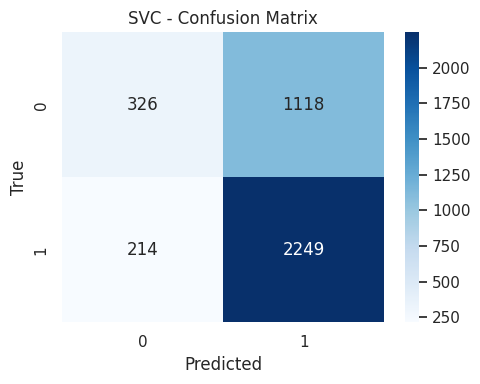


RandomForest:
 Acc: 0.6606  F1: 0.7593  Time/sample: 0.000022s
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.34      0.42      1444
           1       0.69      0.85      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.59      0.59      3907
weighted avg       0.64      0.66      0.64      3907



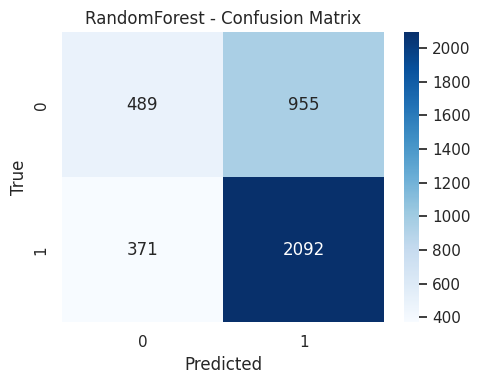


KNN:
 Acc: 0.6386  F1: 0.7325  Time/sample: 0.000039s
Classification report:
               precision    recall  f1-score   support

           0       0.51      0.39      0.44      1444
           1       0.69      0.78      0.73      2463

    accuracy                           0.64      3907
   macro avg       0.60      0.59      0.59      3907
weighted avg       0.62      0.64      0.63      3907



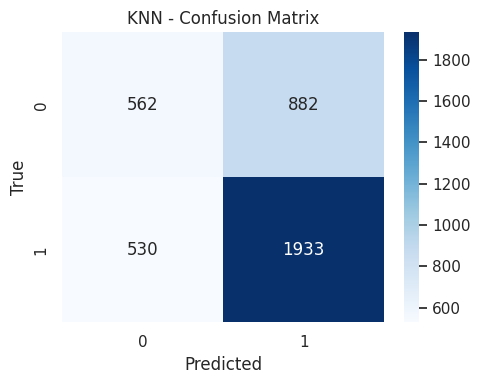


LogisticRegression:
 Acc: 0.6609  F1: 0.7667  Time/sample: 0.000000s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.28      0.38      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.57      3907
weighted avg       0.64      0.66      0.62      3907



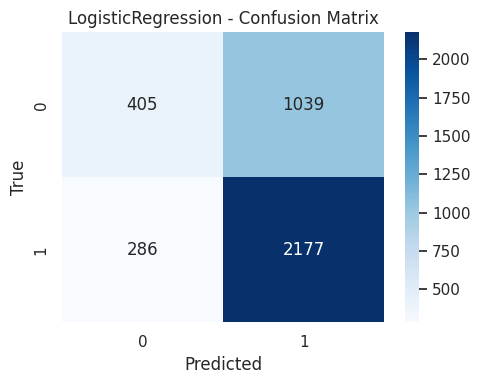


DecisionTree:
 Acc: 0.6598  F1: 0.7564  Time/sample: 0.000001s
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.36      0.44      1444
           1       0.69      0.84      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.64      0.66      0.64      3907



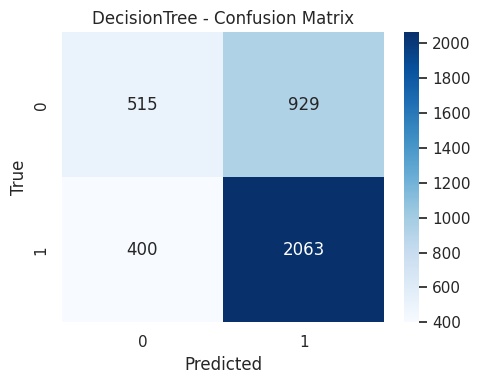

In [ ]:
def eval_on_test(model, X_te, y_te, label_names=None):
    t0 = time.perf_counter()
    y_pred = model.predict(X_te) # Make predictions on the test set
    t1 = time.perf_counter()
    total = t1 - t0
    per_sample = total / max(1, X_te.shape[0])

    is_binary = len(np.unique(y_te)) == 2
    avg = 'binary' if is_binary else 'macro'

    if label_names is not None:
        label_names = [str(x) for x in label_names]

    acc = accuracy_score(y_te, y_pred) # Calculate accuracy
    prec = precision_score(y_te, y_pred, average=avg, zero_division=0) # Calculate precision
    rec = recall_score(y_te, y_pred, average=avg, zero_division=0) # Calculate recall
    f1 = f1_score(y_te, y_pred, average=avg, zero_division=0) # Calculate F1-score
    cr = classification_report(y_te, y_pred, target_names=label_names, zero_division=0) # Generate classification report
    cm = confusion_matrix(y_te, y_pred) # Generate confusion matrix

    return {
        "y_pred": y_pred,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
        "time_per_sample": per_sample,
        "cr": cr,
        "cm": cm
    }

baseline_results = {}
print("\n=== Baseline evaluation on test set ===")

for name, model in best_estimators.items():
    print(f"\n{name}:")
    res = eval_on_test(model, X_test, y_test, label_names=[str(c) for c in label_classes]) # Evaluate each best estimator on the test set
    baseline_results[name] = res
    print(f" Acc: {res['acc']:.4f}  F1: {res['f1']:.4f}  Time/sample: {res['time_per_sample']:.6f}s")
    print("Classification report:\n", res["cr"])


    plt.figure(figsize=(5,4))
    sns.heatmap(res["cm"], annot=True, fmt="d", cmap="Blues",
                xticklabels=[str(c) for c in label_classes],
                yticklabels=[str(c) for c in label_classes])
    plt.title(f"{name} - Confusion Matrix") # Plot confusion matrix
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n=== Building ensembles (Bagging + Voting) ===")
bagging_kwargs = {"n_estimators": 30, "max_samples": 0.8, "random_state": RANDOM_STATE, "n_jobs": N_JOBS} # Parameters for BaggingClassifier

bagged_models = {}
if "SVC" in best_estimators:
    print("Building Bagging over tuned SVC (estimator cloned from best SVC).")
    tuned_svc = best_estimators["SVC"]
    bagged_svc = BaggingClassifier(estimator=clone(tuned_svc), **bagging_kwargs) # Create BaggingClassifier with best SVC
    bagged_svc.fit(X_train, y_train) # Train Bagging SVC
    bagged_models["Bagging SVC"] = bagged_svc
    joblib.dump(bagged_svc, os.path.join(SAVE_DIR, "bagged_svc.joblib")) # Save Bagging SVC model
    print("Saved bagged_svc.joblib")

if "DecisionTree" in best_estimators:
    print("Building Bagging over tuned DecisionTree.")
    tuned_dt = best_estimators["DecisionTree"]
    bagged_dt = BaggingClassifier(estimator=clone(tuned_dt), **bagging_kwargs) # Create BaggingClassifier with best Decision Tree
    bagged_dt.fit(X_train, y_train) # Train Bagging Decision Tree
    bagged_models["Bagging DT"] = bagged_dt
    joblib.dump(bagged_dt, os.path.join(SAVE_DIR, "bagged_dt.joblib")) # Save Bagging Decision Tree model
    print("Saved bagged_dt.joblib")

voting_members = []
if bagged_models:
    for k, m in bagged_models.items():
        voting_members.append((k, clone(m)))
else:
    for k, m in best_estimators.items():
        voting_members.append((k, clone(m))) # Prepare estimators for VotingClassifier

voting = VotingClassifier(estimators=voting_members, voting="soft", n_jobs=N_JOBS) # Create VotingClassifier with soft voting
voting.fit(X_train, y_train) # Train the VotingClassifier
joblib.dump(voting, os.path.join(SAVE_DIR, "voting_soft.joblib")) # Save the VotingClassifier model
print("Saved voting_soft.joblib")


=== Building ensembles (Bagging + Voting) ===
Building Bagging over tuned SVC (estimator cloned from best SVC).
Saved bagged_svc.joblib
Building Bagging over tuned DecisionTree.
Saved bagged_dt.joblib
Saved voting_soft.joblib



=== Ensemble evaluation on test set ===

Bagging SVC - Acc: 0.6609  F1: 0.7681  Time/sample: 0.010699s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.27      0.37      1444
           1       0.68      0.89      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.57      3907
weighted avg       0.64      0.66      0.62      3907



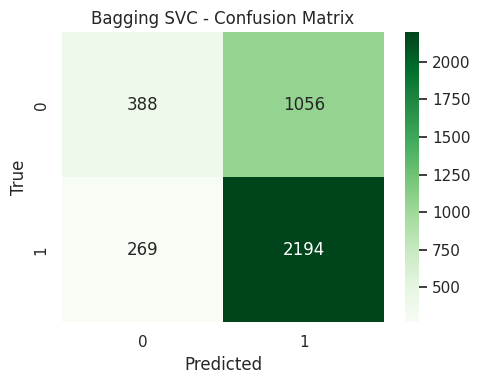


Bagging DT - Acc: 0.6655  F1: 0.7626  Time/sample: 0.000006s
Classification report:
               precision    recall  f1-score   support

           0       0.58      0.35      0.43      1444
           1       0.69      0.85      0.76      2463

    accuracy                           0.67      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.65      0.67      0.64      3907



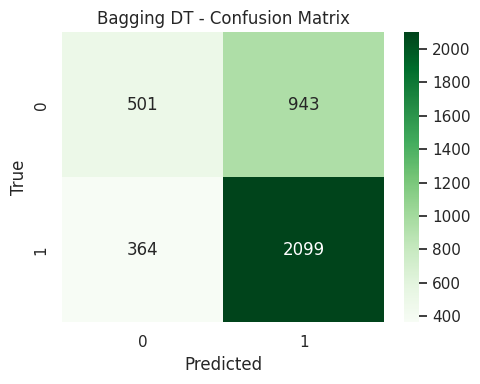


Voting (soft) - Acc: 0.6647  F1: 0.7685  Time/sample: 0.012603s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.59      0.58      3907
weighted avg       0.65      0.66      0.63      3907



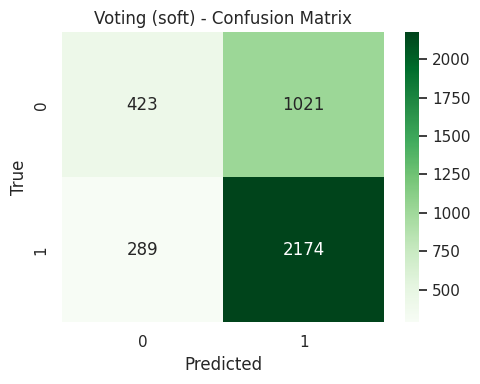

In [ ]:
ensemble_results = {}
all_ensemble_models = {**bagged_models, "Voting (soft)": voting}
print("\n=== Ensemble evaluation on test set ===")
for name, model in all_ensemble_models.items():
    res = eval_on_test(model, X_test, y_test, label_names=label_classes) # Evaluate ensemble models on the test set
    ensemble_results[name] = res
    print(f"\n{name} - Acc: {res['acc']:.4f}  F1: {res['f1']:.4f}  Time/sample: {res['time_per_sample']:.6f}s")
    print("Classification report:\n", res["cr"])
    plt.figure(figsize=(5,4))
    sns.heatmap(res["cm"], annot=True, fmt="d", cmap="Greens", xticklabels=label_classes, yticklabels=label_classes) # Plot confusion matrix
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

In [ ]:



SAVE_DIR = "."

rows = []
for name, res in baseline_results.items():
    rows.append({"model": name, "type": "baseline", "accuracy": res["acc"], "f1": res["f1"], "time_per_sample_s": res["time_per_sample"]})
for name, res in ensemble_results.items():
    rows.append({"model": name, "type": "ensemble", "accuracy": res["acc"], "f1": res["f1"], "time_per_sample_s": res["time_per_sample"]})

comp_df = pd.DataFrame(rows).sort_values("accuracy", ascending=False).set_index("model")


display(comp_df)

csv_path = os.path.join(SAVE_DIR, "model_comparison_from_project.csv")
comp_df.to_csv(csv_path)
print(f"Saved comparison CSV to: {csv_path}")

,type,accuracy,f1,time_per_sample_s
model,,,,
Bagging DT,ensemble,0.665472,0.762579,6.489938e-06
Voting (soft),ensemble,0.664704,0.768469,1.260316e-02
LogisticRegression,baseline,0.660865,0.766684,4.238615e-07
Bagging SVC,ensemble,0.660865,0.768073,1.069850e-02
RandomForest,baseline,0.660609,0.759347,2.240067e-05
DecisionTree,baseline,0.659841,0.756370,7.042101e-07
SVC,baseline,0.659073,0.771527,5.367199e-04
KNN,baseline,0.638597,0.732474,3.949787e-05


Saved comparison CSV to: ./model_comparison_from_project.csv


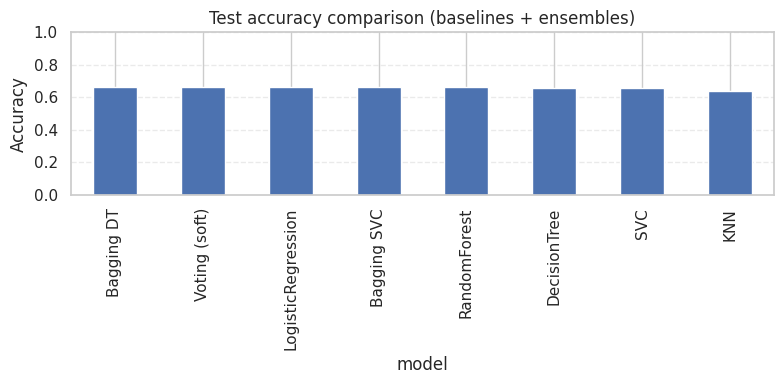

In [ ]:
plt.figure(figsize=(8,4))
comp_df['accuracy'].plot(kind='bar', ylim=(0,1)) # Plot a bar chart of test accuracies
plt.title("Test accuracy comparison (baselines + ensembles)") # Set plot title
plt.ylabel("Accuracy") # Set y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.4) # Add grid lines
plt.tight_layout()
plt.show()

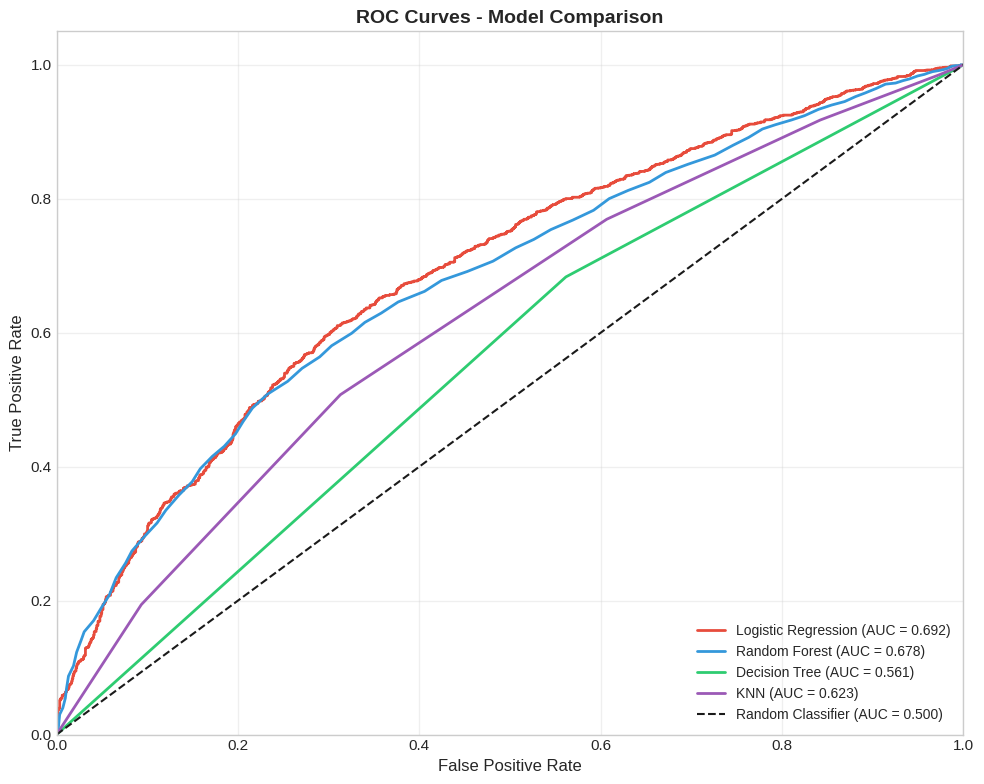

✓ Saved: roc_curves.png


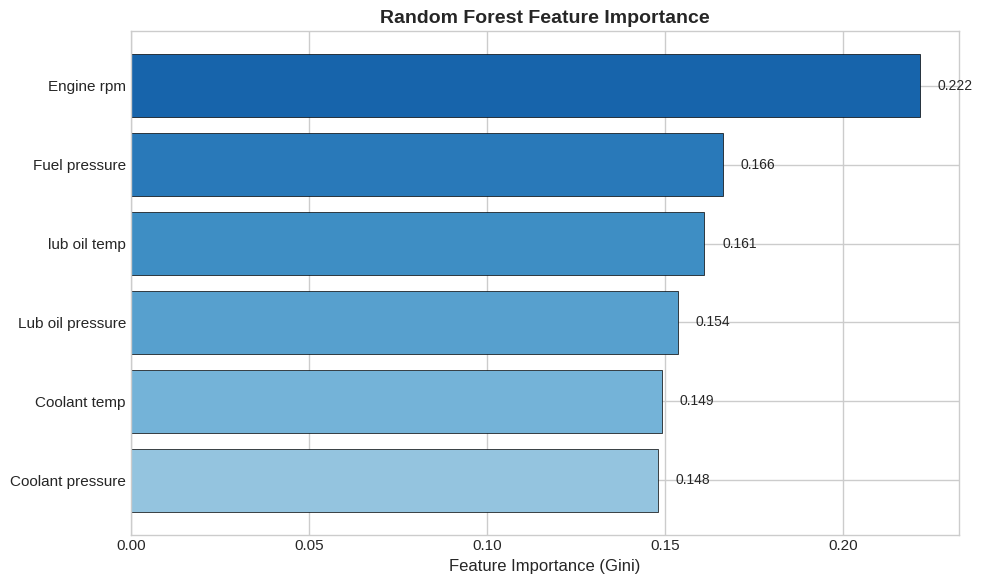

✓ Saved: feature_importance.png

CROSS-VALIDATION RESULTS (5-Fold Stratified)
Logistic Regression      : 0.6622 ± 0.0010
Decision Tree            : 0.5853 ± 0.0096
Random Forest            : 0.6537 ± 0.0051
KNN                      : 0.6316 ± 0.0043
SVM (RBF)                : 0.6632 ± 0.0032
Bagging (DT)             : 0.6479 ± 0.0056


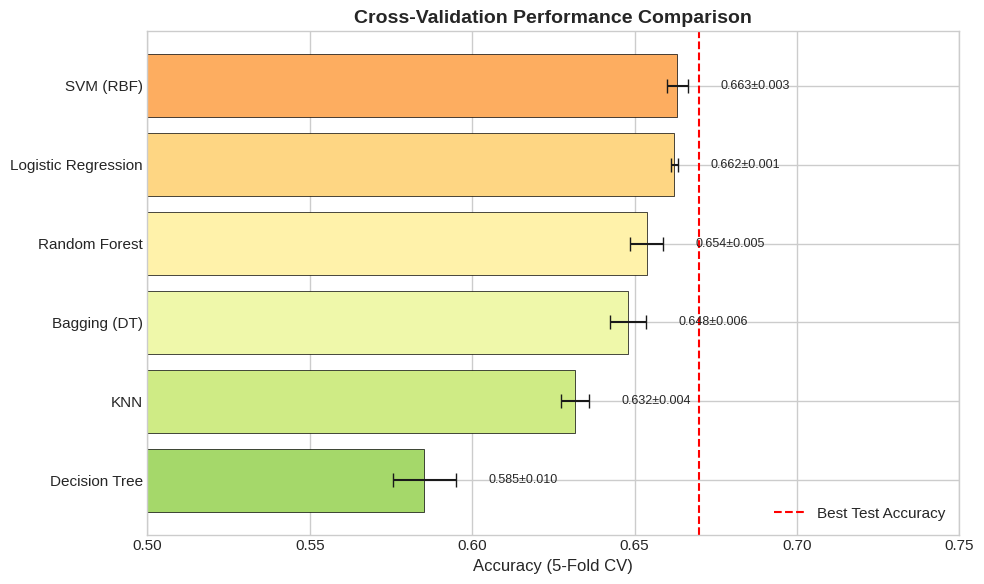

✓ Saved: cv_comparison.png

DETAILED METRICS COMPARISON
              Model  Accuracy  F1 (weighted)  Precision (0)  Recall (0)  F1 (0)  Precision (1)  Recall (1)  F1 (1)
          SVM (RBF)     0.666          0.624          0.608       0.268   0.372          0.677       0.899   0.772
Logistic Regression     0.661          0.627          0.584       0.292   0.389          0.679       0.878   0.766
      Random Forest     0.649          0.634          0.534       0.391   0.451          0.691       0.800   0.742
       Bagging (DT)     0.643          0.632          0.522       0.408   0.458          0.692       0.781   0.734
                KNN     0.630          0.619          0.500       0.393   0.440          0.684       0.769   0.724
      Decision Tree     0.593          0.592          0.448       0.438   0.443          0.675       0.683   0.679

✓ Saved: model_metrics.csv


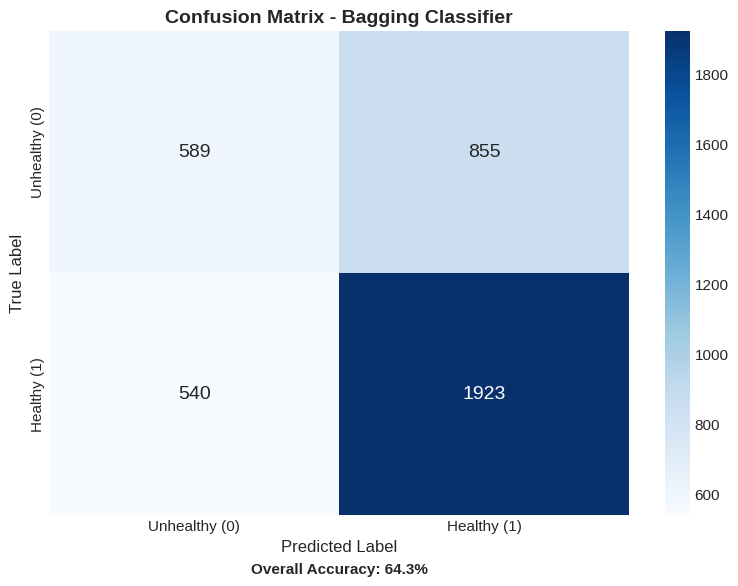

✓ Saved: confusion_matrix_best.png


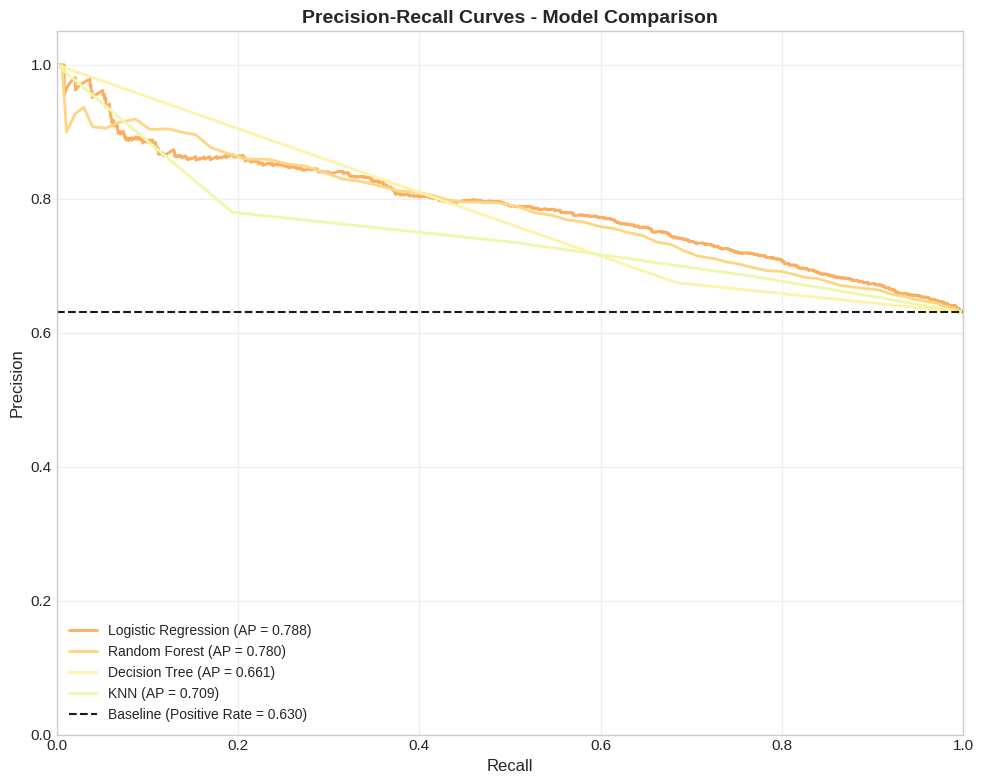

✓ Saved: precision_recall_curves.png

ALL VISUALIZATIONS COMPLETE


In [ ]:
# =============================================================================
# CODE TO ADD TO YOUR NOTEBOOK - Results Visualization
# Run this AFTER your model training section
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# =============================================================================
# 1. ROC CURVES FOR ALL MODELS
# =============================================================================
# Note: You need to have your trained models and X_test, y_test available

# Dictionary to store models that support predict_proba
# Adjust this based on your actual trained models
models_for_roc = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    # Note: Default SVC doesn't have predict_proba, use SVC(probability=True) if needed
}

# Retrain models if needed (or use your already trained models)
# for name, model in models_for_roc.items():
#     model.fit(X_train, y_train)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']

for idx, (name, model) in enumerate(models_for_roc.items()):
    # Fit model
    model.fit(X_train, y_train)

    # Get probability predictions
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function if available
        y_prob = model.decision_function(X_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    ax.plot(fpr, tpr, color=colors[idx % len(colors)], lw=2,
            label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal (random classifier)
ax.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Classifier (AUC = 0.500)')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: roc_curves.png")


# =============================================================================
# 2. FEATURE IMPORTANCE (for tree-based models)
# =============================================================================

# Train a Random Forest to get feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_names = X_train.columns if hasattr(X_train, 'columns') else num_cols
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': importances[indices]
})

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(importance_df)))[::-1]
bars = ax.barh(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Feature Importance (Gini)', fontsize=12)
ax.set_title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Highest importance at top

# Add value labels
for bar, val in zip(bars, importance_df['Importance']):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}',
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: feature_importance.png")


# =============================================================================
# 3. CROSS-VALIDATION SCORES
# =============================================================================

from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
models_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42),
    "Bagging (DT)": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS (5-Fold Stratified)")
print("="*60)

for name, model in models_cv.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"{name:25s}: {scores.mean():.4f} ± {scores.std():.4f}")

# Plot CV results
fig, ax = plt.subplots(figsize=(10, 6))

names = list(cv_results.keys())
means = [cv_results[n]['mean'] for n in names]
stds = [cv_results[n]['std'] for n in names]

# Sort by mean accuracy
sorted_idx = np.argsort(means)[::-1]
names = [names[i] for i in sorted_idx]
means = [means[i] for i in sorted_idx]
stds = [stds[i] for i in sorted_idx]

colors = plt.cm.RdYlGn(np.linspace(0.3, 0.7, len(names)))

bars = ax.barh(names, means, xerr=stds, color=colors, edgecolor='black',
               linewidth=0.5, capsize=5, error_kw={'linewidth': 1.5})

ax.set_xlabel('Accuracy (5-Fold CV)', fontsize=12)
ax.set_title('Cross-Validation Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xlim([0.5, 0.75])
ax.axvline(x=0.67, color='red', linestyle='--', linewidth=1.5, label='Best Test Accuracy')
ax.invert_yaxis()
ax.legend(loc='lower right')

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    ax.text(mean + std + 0.01, bar.get_y() + bar.get_height()/2,
            f'{mean:.3f}±{std:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('cv_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: cv_comparison.png")


# =============================================================================
# 4. DETAILED METRICS TABLE
# =============================================================================

print("\n" + "="*60)
print("DETAILED METRICS COMPARISON")
print("="*60)

metrics_data = []

for name, model in models_cv.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Per-class metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics_data.append({
        'Model': name,
        'Accuracy': acc,
        'F1 (weighted)': f1,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1 (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1 (1)': report['1']['f1-score']
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)
print(metrics_df.round(3).to_string(index=False))

# Save to CSV for reference
metrics_df.to_csv('model_metrics.csv', index=False)
print("\n✓ Saved: model_metrics.csv")


# =============================================================================
# 5. CONFUSION MATRIX HEATMAP (for best model)
# =============================================================================

# Using Bagging Classifier as best model (adjust if different)
from sklearn.ensemble import BaggingClassifier

best_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhealthy (0)', 'Healthy (1)'],
            yticklabels=['Unhealthy (0)', 'Healthy (1)'],
            annot_kws={'size': 14},
            ax=ax)

ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix - Bagging Classifier', fontsize=14, fontweight='bold')

# Add accuracy annotation
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
ax.text(0.5, -0.12, f'Overall Accuracy: {accuracy:.1%}',
        transform=ax.transAxes, ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix_best.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: confusion_matrix_best.png")


# =============================================================================
# 6. PRECISION-RECALL CURVE (important for imbalanced data)
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

for idx, (name, model) in enumerate(models_for_roc.items()):
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        continue

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)

    ax.plot(recall, precision, color=colors[idx % len(colors)], lw=2,
            label=f'{name} (AP = {ap:.3f})')

# Baseline (proportion of positive class)
baseline = y_test.astype(int).sum() / len(y_test)
ax.axhline(y=baseline, color='k', linestyle='--', lw=1.5,
           label=f'Baseline (Positive Rate = {baseline:.3f})')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision-Recall Curves - Model Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('precision_recall_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: precision_recall_curves.png")

print("\n" + "="*60)
print("ALL VISUALIZATIONS COMPLETE")
print("="*60)